# Clasificacion Usando Trayectorias

In [108]:
import os
import subprocess
import numpy as np
import pandas as pd

i = 1
home = os.getenv("HOME")
videos = home + '/' + 'Vídeos/'
videos_pk = frames = os.listdir(videos + 'pk/')
videos_std = frames = os.listdir(videos + 'std/')

X = []
y = []

for video in videos_pk:
    subprocess.call(['bash', 'sacar_trayectorias_(tipo).sh', video,'pk/'])
    Trayectories = pd.read_csv('trayectories', sep=' ', header=None)
    del Trayectories[34]
    Trayectories = Trayectories[abs(Trayectories[32]-Trayectories[2])>=2]
    Trayectories = Trayectories[abs(Trayectories[33]-Trayectories[3])>=2]
    data = Trayectories.values
    X.append(data[:,2:])
    del Trayectories
    del data
    y.append(0)
    print('video: ' + str(i) + ' Procesado de: ' + str(len(videos_pk)+ len(videos_std)))
    i = i + 1

    
for video in videos_std:
    subprocess.call(['bash', 'sacar_trayectorias_(tipo).sh', video,'std/'])
    Trayectories = pd.read_csv('trayectories', sep=' ', header=None)
    del Trayectories[34]
    Trayectories = Trayectories[abs(Trayectories[32]-Trayectories[2])>=2]
    Trayectories = Trayectories[abs(Trayectories[33]-Trayectories[3])>=2]
    data = Trayectories.values
    X.append(data[:,2:])
    del Trayectories
    del data
    y.append(1)         
    print('video: ' + str(i) + ' Procesado de: ' + str(len(videos_pk)+ len(videos_std)))
    i = i + 1
    
    
for i in range(14):
    tray = X[i]
    total = tray.shape[0]
    mitad = int(total/2)
    inicio = mitad - 1500
    final = mitad + 1500
    data = tray[inicio:final]
    data = data.reshape((1,-1))
    X[i] = data[0]

video: 1 Procesado de: 14
video: 2 Procesado de: 14
video: 3 Procesado de: 14
video: 4 Procesado de: 14
video: 5 Procesado de: 14
video: 6 Procesado de: 14
video: 7 Procesado de: 14
video: 8 Procesado de: 14
video: 9 Procesado de: 14
video: 10 Procesado de: 14
video: 11 Procesado de: 14
video: 12 Procesado de: 14
video: 13 Procesado de: 14
video: 14 Procesado de: 14


In [109]:
import numpy as np
print('x.shape: ', np.array(X).shape, 'y.shape: ', np.array(y).shape)

('x.shape: ', (14, 96000), 'y.shape: ', (14,))


In [110]:
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

# Naive Gaussian

[0.42857143 0.2        0.45833333 0.43333333 0.22222222 0.57142857
 0.25       0.38888889 0.7        0.5        0.5        0.46153846]
[0.         0.16329932 0.31457643 0.13333333 0.22906142 0.31943828
 0.35355339 0.3928371  0.4        0.47673129 0.5        0.49851852]
0.7


Text(0.5,1,'Gaussian NB')

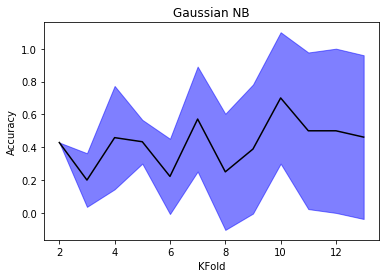

In [111]:
from sklearn.naive_bayes import GaussianNB

est = GaussianNB()
num_kfold = range(2,14,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, y, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("KFold")
plt.ylabel("Accuracy")
plt.title("Gaussian NB")

# DecisionTree

[0.57142857 0.51666667 0.5625     0.5        0.38888889 0.5
 0.6875     0.61111111 0.5        0.54545455 0.625      0.57692308]
[0.14285714 0.16499158 0.16002387 0.1490712  0.28327886 0.26726124
 0.34798527 0.45812285 0.5        0.4979296  0.46210569 0.47418569]
0.6875


Text(0.5,1,'Decision Tree')

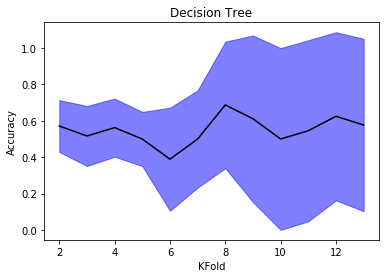

In [112]:
from sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier()

num_kfold = range(2,14,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, y, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("KFold")
plt.ylabel("Accuracy")
plt.title("Decision Tree")

# Random Forest

[0.35714286 0.43333333 0.4375     0.5        0.52777778 0.64285714
 0.75       0.61111111 0.8        0.45454545 0.5        0.5       ]
[0.07142857 0.16996732 0.16002387 0.25819889 0.29528183 0.34992711
 0.35355339 0.3928371  0.4        0.44997704 0.5        0.48038446]
0.8


Text(0.5,1,'Random Forest')

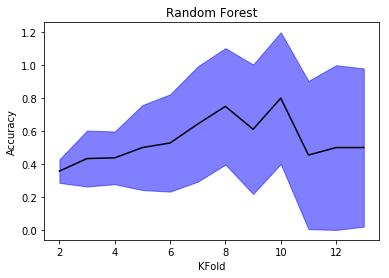

In [113]:
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier()

num_kfold = range(2,14,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, y, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("KFold")
plt.ylabel("Accuracy")
plt.title("Random Forest")

# Support Vector Machine

/home/experimentos/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.42857143 0.28333333 0.27083333 0.3        0.27777778 0.21428571
 0.25       0.11111111 0.1        0.09090909 0.08333333 0.03846154]
[0.         0.08498366 0.18042196 0.16329932 0.20786985 0.24743583
 0.25       0.20786985 0.2        0.1928473  0.186339   0.13323468]
0.42857142857142855


Text(0.5,1,'SVM')

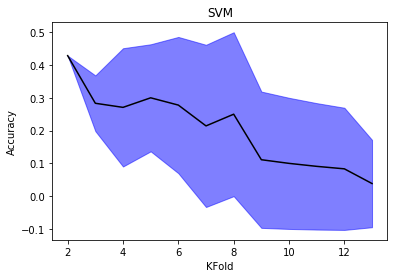

In [116]:
from sklearn.svm import SVC
est = SVC()

num_kfold = range(2,14,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, y, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("KFold")
plt.ylabel("Accuracy")
plt.title("SVM")

## Tunning

[0.64285714 0.58333333 0.625      0.73333333 0.66666667 0.5
 0.6875     0.66666667 0.75       0.72727273 0.66666667 0.69230769]
[0.07142857 0.14337209 0.375      0.24944383 0.25458754 0.37796447
 0.34798527 0.40824829 0.3354102  0.39101478 0.42491829 0.46153846]
0.75


Text(0.5,1,'SVM Tunning')

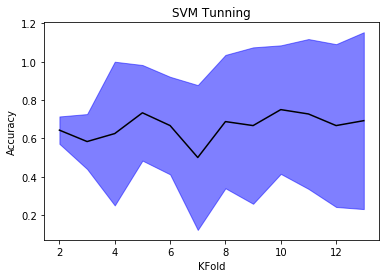

In [114]:
from sklearn.svm import SVC
est = SVC(kernel = 'linear')

num_kfold = range(2,14,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, y, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("KFold")
plt.ylabel("Accuracy")
plt.title("SVM Tunning")

# K-Nearest Neighbors

[0.5        0.35       0.5        0.53333333 0.52777778 0.5
 0.5        0.5        0.45       0.45454545 0.45833333 0.5       ]
[0.07142857 0.1779513  0.21245915 0.26666667 0.2239516  0.26726124
 0.35355339 0.40824829 0.41533119 0.44997704 0.4768968  0.48038446]
0.5333333333333333


Text(0.5,1,'K-NN')

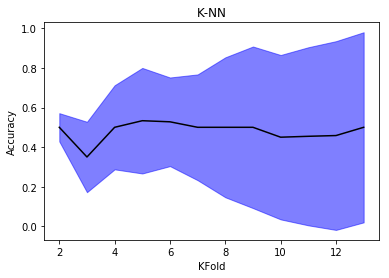

In [115]:
from sklearn.neighbors import KNeighborsClassifier
est = KNeighborsClassifier(n_neighbors = 4)

num_kfold = range(2,14,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, y, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("KFold")
plt.ylabel("Accuracy")
plt.title("K-NN")

# Clasificar cada Trayectoria

In [1]:
import os
import subprocess
import numpy as np
import pandas as pd

i = 1
home = os.getenv("HOME")
videos = home + '/' + 'Vídeos/'
videos_pk = frames = os.listdir(videos + 'pk/')
videos_std = frames = os.listdir(videos + 'std/')
pk_test = videos_pk[i]
std_test = videos_std[i]
videos_pk.pop(i)
videos_std.pop(i)


print 'Training: ',videos_pk
print 'Training: ',videos_std
print 'Test: '    ,pk_test
print 'Test: '    ,std_test



X = []
labels = []

for video in videos_pk:
    
    subprocess.call(['bash', 'sacar_trayectorias_(tipo).sh', video,'pk/'])
    Trayectories = pd.read_csv('trayectories', sep=' ', header=None)
    del Trayectories[34]
    Trayectories = Trayectories[abs(Trayectories[32]-Trayectories[2])>=2]
    Trayectories = Trayectories[abs(Trayectories[33]-Trayectories[3])>=2]
    data = Trayectories.values
    
    for i in range(len(data)):   
        X.append(data[i,2:])
        labels.append(0)
        
        

for video in videos_std:
    
    subprocess.call(['bash', 'sacar_trayectorias_(tipo).sh', video,'std/'])
    Trayectories = pd.read_csv('trayectories', sep=' ', header=None)
    del Trayectories[34]
    Trayectories = Trayectories[abs(Trayectories[32]-Trayectories[2])>=2]
    Trayectories = Trayectories[abs(Trayectories[33]-Trayectories[3])>=2]
    data = Trayectories.values
    
    for i in range(len(data)):     
        X.append(data[i,2:])
        labels.append(1)


    
print 'X.SHAPE(): ', np.shape(X), 'y.shape: ', np.shape(labels) 

Training:  ['pk6.mp4', 'pk3.mp4', 'pk5.mp4', 'pk4.mp4', 'pk7.mp4', 'pk2.mp4']
Training:  ['std2.mp4', 'std4.mp4', 'std1.mp4', 'std3.mp4', 'std7.mp4', 'std6.mp4']
Test:  pk1.mp4
Test:  std5.mp4
X.SHAPE():  (74045, 32) y.shape:  (74045,)


In [119]:
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Naive Gaussian

[0.56576401 0.56680399 0.5662773  0.56607468]
[0.004179   0.00145907 0.00220601 0.0074419 ]
0.5668039928350787


Text(0.5,1,'Gaussian NB')

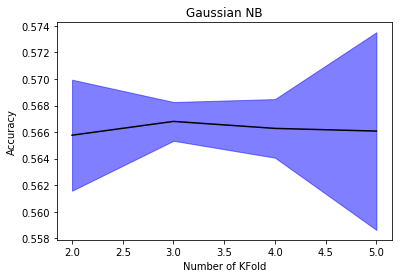

In [120]:
from sklearn.naive_bayes import GaussianNB

est = GaussianNB()
num_kfold = range(2,6,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, labels, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("Number of KFold")
plt.ylabel("Accuracy")
plt.title("Gaussian NB")

# Decision Tree

[0.73922611 0.74862593 0.7502735  0.75396043]
[0.00233994 0.00481027 0.00187451 0.00273582]
0.7539604294685665


Text(0.5,1,'Decision Tree')

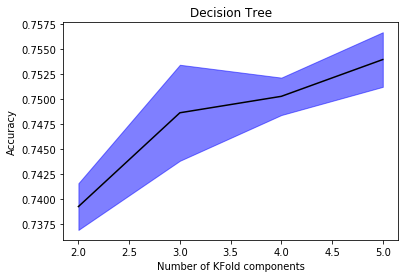

In [121]:
from sklearn.tree import DecisionTreeClassifier

est = DecisionTreeClassifier()
num_kfold = range(2,6,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, labels, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("Number of KFold components")
plt.ylabel("Accuracy")
plt.title("Decision Tree")

# Random Forest

[0.79100548 0.80006754 0.80490241 0.80715781]
[0.00071296 0.00044533 0.00199642 0.00398816]
0.8071578094402053


Text(0.5,1,'Random Forest')

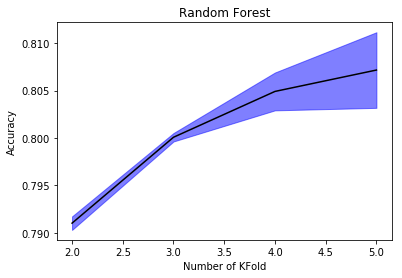

In [122]:
from sklearn.ensemble import RandomForestClassifier

est = RandomForestClassifier()
num_kfold = range(2,6,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, labels, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("Number of KFold")
plt.ylabel("Accuracy")
plt.title("Random Forest")

# Support Vector Machine

[0.60032413 0.60289018 0.60471332 0.60576676]
[7.56340621e-05 2.98312692e-03 2.87726339e-03 2.83849168e-03]
0.605766763454656


Text(0.5,1,'SVM')

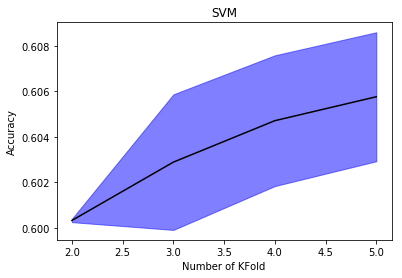

In [123]:
from sklearn.svm import SVC

est = SVC()
num_kfold = range(2,6,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, labels, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("Number of KFold")
plt.ylabel("Accuracy")
plt.title("SVM")

In [ ]:
from sklearn.svm import SVC

est = SVC(kernel = 'linear')
num_kfold = range(2,6,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, labels, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("Number of KFold components")
plt.ylabel("Accuracy")
plt.title("SVM Tunning")

# K-Nearest Neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

est =KNeighborsClassifier(n_neighbors = 4)
num_kfold = range(2,6,1)
means, stds = [], []

for i in num_kfold:
    s = cross_val_score(est, X, labels, cv=KFold(i, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means= np.r_[means]
stds = np.r_[stds]
print means
print stds
print max(means)
plt.plot(num_kfold, means, color='black')
plt.fill_between(num_kfold, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("Number of KFold components")
plt.ylabel("Accuracy")
plt.title("K-NN")

# Clasificar las trayectorias de un nuevo video

In [7]:
def matriz_de_trayectorias(dataframe):
    #cantidad de fotogramas + 1 = inicio y final
    matriz = np.zeros((Total_de_trayectorias, cantidad_de_fotogramas + 1, 2))
    data = dataframe.values
    #Información del frame de inicio y de final de la trayectoria
    matriz[:,cantidad_de_fotogramas,0] = data[:,0]
    matriz[:,cantidad_de_fotogramas,1] = data[:,1]
    for i in range(Total_de_trayectorias):
        tray = data[i,:].reshape((34,1))
        j = 0
        while j <= 32:
            if j == 0 or j == 1:
                inicio = int(tray[0])-1
            else:
                
                matriz[i,inicio,0] = tray[j]
                matriz[i,inicio,1] = tray[j+1]
                inicio = inicio + 1
            j = j + 2
        
    return matriz

In [8]:
def sort_dir(path):
    frames = os.listdir(path)

    indices=[]

    for i in frames:
        indices.append(int(i[10:13]))


    sort_indices = np.sort(indices)
    sort_frames = []       
    for i in sort_indices:
            if i<10:
                sort_frames.append("fotograma-00"+str(i)+".png") 
            elif i<100:  
                 sort_frames.append("fotograma-0"+str(i)+".png")
            else:
                 sort_frames.append("fotograma-"+str(i)+".png")
    return sort_frames

In [95]:
def quitar_ceros(string):
    
    bandera = True
    palabra = list(string)
    fotograma = ''
    i = 10
    
    while bandera == True:
        
        if palabra[i]=='0':
            
            i += 1
        else:
            bandera = False
    
    j=10
    while j<i:
        
        palabra.pop(10)
        j += 1
        
    
    
    for pal in palabra:
        fotograma = fotograma + pal
    return fotograma
    

In [100]:
def Dibujar_rectas(frames_originales,frames_para_overleaf, path_originales, carpeta,matriz_tray, Total_de_trayectorias, cantidad_de_fotogramas, y_kmeans):
    
    import cv2
    import subprocess
    
    subprocess.call(['mkdir',carpeta])
    for i,frame in enumerate(frames_originales):
        
        img = cv2.imread(path_originales + frame)
        
        if i+1 != len(frames_originales):
            
            for j in range(Total_de_trayectorias):
                
                if(i+1>=matriz_tray[j,cantidad_de_fotogramas,0] and i+1<=matriz_tray[j,cantidad_de_fotogramas,1]):
                    
                    tray = matriz_tray[j,:i+2,:]
                    tray_mask = tray != 0
                    tray = tray[tray_mask]
                    w = tray.shape
                    w = int(w[0]/2)
                    tray = tray.reshape((w,2))
                    k = 0
                    intencidad = y_kmeans[j]
                    
                    while k <= w-2:
                        
                            if intencidad == 0:
                                
                                img = cv2.line(img,(int(tray[k,1]),int(tray[k,0])),(int(tray[k+1,1]),int(tray[k+1,0])),(255,0,0),1)
                                
                            else:
                                
                                img = cv2.line(img,(int(tray[k,1]),int(tray[k,0])),(int(tray[k+1,1]),int(tray[k+1,0])),(0,255,0),1)
                                

                                
                            k = k + 1
                            
        cv2.imwrite(path_originales[:0]+carpeta + frames_para_overleaf[i] , img)

In [10]:
subprocess.call(['bash', 'sacar_trayectorias_(tipo).sh', pk_test,'pk/'])

Trayectories = pd.read_csv('trayectories', sep=' ', header=None)
del Trayectories[34]
Tayectories = Trayectories[abs(Trayectories[32]-Trayectories[2])>=2]
Trayectories = Trayectories[abs(Trayectories[33]-Trayectories[3])>=2]
Trayectories_pk = Trayectories.values[:,2:]


Cabecera = pd.read_csv('cabecera', sep=' ', header=None)
Total_de_trayectorias = len(Trayectories[0])
y = Cabecera[1].values[0]
x = Cabecera[2].values[0]
cantidad_de_fotogramas = Cabecera[3].values[0]
print('Total de trayectorias: ' + str(Total_de_trayectorias), 'Alto: ' + str(y), 'Ancho: ' + str(x), 'Cantidad de fotogramas: ' + str(cantidad_de_fotogramas))

('Total de trayectorias: 14824', 'Alto: 270', 'Ancho: 480', 'Cantidad de fotogramas: 228')


In [106]:
import subprocess
from sklearn.ensemble import RandomForestClassifier
import cv2

matriz_tray = matriz_de_trayectorias(Trayectories)
subprocess.call(['bash', 'sacar_fotogramas.sh', '/home/experimentos/Vídeos/pk/', pk_test])
frames = sort_dir('/home/experimentos/Documentos/repositorio_de_Ai/' + pk_test + '/')
frames_para_overleaf = [quitar_ceros(frame) for frame in frames]

est = RandomForestClassifier()
est.fit(X,labels)

y_pre = est.predict(Trayectories_pk)

Dibujar_rectas(frames, frames_para_overleaf, '/home/experimentos/Documentos/repositorio_de_Ai/' + pk_test + '/', 
               pk_test + '_clasificados/' ,matriz_tray, Total_de_trayectorias, cantidad_de_fotogramas, y_pre)

for i,frame in enumerate(frames):
    
    img = cv2.imread('/home/experimentos/Documentos/repositorio_de_Ai/' + pk_test + '/'+frame)
    subprocess.call(['rm', '-r', '/home/experimentos/Documentos/repositorio_de_Ai/' + pk_test + '/'+frame])
    cv2.imwrite('/home/experimentos/Documentos/repositorio_de_Ai/' + pk_test + '/'+frames_para_overleaf[i],img)